In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import datetime as dt
import seaborn as sns


## Importing data

In [3]:
# #List out the data source files

# info_list=["Crude_oil_spot_USD_per_barrel.xlsx",
#            "China_crude_oil_import_monthly_total.xlsx",
#           "crude_oil_stockpile.xlsx",
#           "google_trends_data1.xlsx",
#           "LSFO_volume.xlsx",
#           "stock_index_2013_2023.xlsx",
#           "us_macro_data.xlsx",
#           "USD_index.xlsx"
#           ]

In [4]:
# #add data into dataframe

# df=pd.DataFrame()
# for i in info_list:
#     dfi=pd.read_excel(i, 
#                       index_col=0)
    
#     df=df.join(dfi, how="outer")
    
# #     pd.merge(df, dfi, 
# #              on="Date", 
# #              how ="outer")
# df

,Crude oil spot USD per barrel (Brent),Crude oil spot USD per barrel (WTI),"China crude oil import monthly total (10,000USD)",Crude oil stockpile OECD,Crude oil stockpile worldwide,Crude oil strategic reserve: US M_barrels,Crude oil non-strategic reserve: US M_barrels,Crude oil production: non-OPEC K_barrels per day,Crude oil production: worldwide K_barrels per day,Crude oil production: OPEC K_barrels per day,...,NASDAQ Composite,CPI_U,CPI_ENERGY,PPI_MANUFACTURING,PPI_MINING,REAL_DOLLAR_INDEX,USD_EURO_EXCHANGE_RATE,USD index,Euro to USD,LME 3 month Copper futures USD per ton
Date,,,,,,,,,,,,,,,,,,,,,
1970-01-31,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-02-28,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-03-31,NaN,NaN,NaN,NaN,NaN,351.278,416.970,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-04-30,NaN,NaN,NaN,NaN,NaN,350.330,417.299,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1970-05-31,NaN,NaN,NaN,NaN,NaN,347.454,439.786,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,77.77,82.25,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14199.980469,NaN,NaN,NaN,NaN,NaN,1.0923,103.6092,1.09108,8470.0
2023-11-22,77.10,79.63,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,14265.860352,NaN,NaN,NaN,NaN,NaN,1.0871,103.8731,1.08888,8376.5
2023-11-23,76.40,81.05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.7609,1.09058,8397.0


In [6]:
# #save to csv file
#(helps to save a bit of time and prevent tempering)

# df.to_csv("joined_df.csv")

## re-import & inspect data

In [140]:
df=pd.read_csv("joined_df.csv",
              index_col=0)
df.index = pd.to_datetime(df.index)


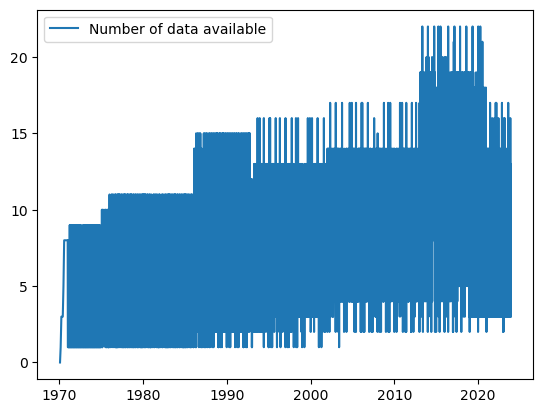

In [141]:
from matplotlib.dates import YearLocator, AutoDateLocator

fig, ax = plt.subplots()

ax.plot(df.index, df.count(axis=1), label='Number of data available')

ax.xaxis.set_major_locator(YearLocator())

# Automatically adjust the date ticks
ax.xaxis.set_major_locator(AutoDateLocator())

# Format the date ticks as years
ax.xaxis.set_major_formatter(plt.matplotlib.dates.DateFormatter('%Y'))

# Display the legend and show the plot
ax.legend()
plt.show()

In [142]:
#information less available in the past, decide to work on data between 2013 and 2023

import datetime

start_year=2013
end_year=2023
buffer_date=datetime.datetime(2012,12,1)

processed_df=df.loc[(df.index>=buffer_date) & (df.index.year<=end_year)]


In [143]:
#basically identify data with lower frequency than monthly updates
(processed_df.isnull().mean()<0.96)

Crude oil spot USD per barrel (Brent)                 True
Crude oil spot USD per barrel  (WTI)                  True
China crude oil import monthly total (10,000USD)      True
Crude oil stockpile OECD                              True
Crude oil stockpile worldwide                         True
Crude oil strategic reserve: US M_barrels            False
Crude oil non-strategic reserve: US M_barrels        False
Crude oil production: non-OPEC K_barrels per day     False
Crude oil production: worldwide K_barrels per day    False
Crude oil production: OPEC K_barrels per day         False
Natrual gas spot USD per M_heat_unit                 False
Crude oil consumption: OPEC K_barrels per day        False
War                                                   True
OPEC+                                                 True
isPartial                                             True
LSFO non-commercial Long Volume                       True
LSFO non-commercial Short Volume                      Tr

In [144]:
#too many missing data, have to drop some

droplist=["Natrual gas spot USD per M_heat_unit",
          "Crude oil strategic reserve: US M_barrels",
          "Crude oil non-strategic reserve: US M_barrels",
          "Crude oil production: non-OPEC K_barrels per day",
          "Crude oil production: worldwide K_barrels per day",
          "Crude oil production: OPEC K_barrels per day",
          "Natrual gas spot USD per M_heat_unit",
          "Crude oil consumption: OPEC K_barrels per day",
          "REAL_DOLLAR_INDEX",
          "War",
         "OPEC+",
          'isPartial'
         ]

processed_df=processed_df.drop(columns=droplist)

In [145]:
processed_df

,Crude oil spot USD per barrel (Brent),Crude oil spot USD per barrel (WTI),"China crude oil import monthly total (10,000USD)",Crude oil stockpile OECD,Crude oil stockpile worldwide,LSFO non-commercial Long Volume,LSFO non-commercial Short Volume,LSFO Total Volume,S&P 500,Dow Jones Industrial,...,AMEX Composite,NASDAQ Composite,CPI_U,CPI_ENERGY,PPI_MANUFACTURING,PPI_MINING,USD_EURO_EXCHANGE_RATE,USD index,Euro to USD,LME 3 month Copper futures USD per ton
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-03,89.03,111.340,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9000,1.30520,8014.00
2012-12-04,88.49,110.110,NaN,NaN,NaN,346065.0,152232.0,1549067.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.6600,1.30950,8035.00
2012-12-05,87.90,109.360,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.8400,1.30640,8076.00
2012-12-06,86.29,107.390,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.2300,1.29690,7997.25
2012-12-07,85.91,107.175,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.4100,1.29280,8038.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,77.77,82.250,NaN,NaN,NaN,350785.0,143461.0,1553677.0,4538.189941,35088.289062,...,NaN,14199.980469,NaN,NaN,NaN,NaN,1.0923,103.6092,1.09108,8470.00
2023-11-22,77.10,79.630,NaN,NaN,NaN,NaN,NaN,NaN,4556.620117,35273.031250,...,NaN,14265.860352,NaN,NaN,NaN,NaN,1.0871,103.8731,1.08888,8376.50
2023-11-23,76.40,81.050,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,103.7609,1.09058,8397.00


In [146]:
#create lag between y and X variables
X_columns=processed_df.columns[processed_df.columns!="Crude oil spot USD per barrel (Brent)"].to_list()

processed_df=processed_df.ffill()
processed_df.loc[:, X_columns]=\
    processed_df.loc[:, X_columns].shift(1)

In [147]:
processed_df

,Crude oil spot USD per barrel (Brent),Crude oil spot USD per barrel (WTI),"China crude oil import monthly total (10,000USD)",Crude oil stockpile OECD,Crude oil stockpile worldwide,LSFO non-commercial Long Volume,LSFO non-commercial Short Volume,LSFO Total Volume,S&P 500,Dow Jones Industrial,...,AMEX Composite,NASDAQ Composite,CPI_U,CPI_ENERGY,PPI_MANUFACTURING,PPI_MINING,USD_EURO_EXCHANGE_RATE,USD index,Euro to USD,LME 3 month Copper futures USD per ton
Date,,,,,,,,,,,,,,,,,,,,,
2012-12-03,89.03,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2012-12-04,88.49,111.34,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.9000,1.30520,8014.00
2012-12-05,87.90,110.11,NaN,NaN,NaN,346065.0,152232.0,1549067.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.6600,1.30950,8035.00
2012-12-06,86.29,109.36,NaN,NaN,NaN,346065.0,152232.0,1549067.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,79.8400,1.30640,8076.00
2012-12-07,85.91,107.39,NaN,NaN,NaN,346065.0,152232.0,1549067.0,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,80.2300,1.29690,7997.25
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2023-11-21,77.77,83.61,3235356.0,907.0,907.0,364379.0,148645.0,1639133.0,4547.379883,35151.039062,...,1972.079956,14284.530273,307.619,286.877,249.088,232.823,1.0945,103.4892,1.09399,8447.50
2023-11-22,77.10,82.25,3235356.0,907.0,907.0,350785.0,143461.0,1553677.0,4538.189941,35088.289062,...,1972.079956,14199.980469,307.619,286.877,249.088,232.823,1.0923,103.6092,1.09108,8470.00
2023-11-23,76.40,79.63,3235356.0,907.0,907.0,350785.0,143461.0,1553677.0,4556.620117,35273.031250,...,1972.079956,14265.860352,307.619,286.877,249.088,232.823,1.0871,103.8731,1.08888,8376.50


In [148]:
processed_df=processed_df.loc[(processed_df.index.year>=start_year) & (processed_df.index.year<=end_year)]

#doing a bfill because some information is published at say 5th Jan, so 4 days of information would be missing
processed_df=processed_df.bfill()

processed_df.info()

Crude oil spot USD per barrel (Brent)               0
Crude oil spot USD per barrel  (WTI)                0
China crude oil import monthly total (10,000USD)    0
Crude oil stockpile OECD                            0
Crude oil stockpile worldwide                       0
LSFO non-commercial Long Volume                     0
LSFO non-commercial Short Volume                    0
LSFO Total Volume                                   0
S&P 500                                             0
Dow Jones Industrial                                0
NYSE Composite                                      0
AMEX Composite                                      0
NASDAQ Composite                                    0
CPI_U                                               0
CPI_ENERGY                                          0
PPI_MANUFACTURING                                   0
PPI_MINING                                          0
USD_EURO_EXCHANGE_RATE                              0
USD index                   

Now the dataframe is clean:

Removed columns with lower update frequency than monthly

It has 1 day feature lag

No NaN

In [152]:
processed_df.to_csv("processed_df.csv")

## EDA

In [150]:
processed_df.describe()

,Crude oil spot USD per barrel (Brent),Crude oil spot USD per barrel (WTI),"China crude oil import monthly total (10,000USD)",Crude oil stockpile OECD,Crude oil stockpile worldwide,LSFO non-commercial Long Volume,LSFO non-commercial Short Volume,LSFO Total Volume,S&P 500,Dow Jones Industrial,...,AMEX Composite,NASDAQ Composite,CPI_U,CPI_ENERGY,PPI_MANUFACTURING,PPI_MINING,USD_EURO_EXCHANGE_RATE,USD index,Euro to USD,LME 3 month Copper futures USD per ton
count,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,3164.000000,3164.000000,3.164000e+03,3164.000000,3164.000000,...,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000,3164.000000
mean,66.786912,71.791907,1.878755e+06,1109.608479,1109.604298,530959.843869,155241.345765,1.947613e+06,2930.209065,24766.906493,...,2273.770334,8300.582381,257.858786,231.320229,204.974769,197.878894,1.157623,94.821631,1.157625,6968.951723
std,21.875488,24.027065,6.448040e+05,142.593580,142.586066,127368.346328,56976.100506,3.018913e+05,942.393539,6908.716752,...,273.968465,3686.238179,22.650839,35.246166,23.390060,42.651238,0.092995,7.291492,0.092985,1482.175270
min,-37.630000,13.280000,7.373263e+05,866.000000,866.000000,289653.000000,66435.000000,1.386635e+06,1457.150024,13328.849609,...,1487.229980,3091.810059,231.679000,176.401000,178.700000,120.600000,0.961600,79.150000,0.959350,4325.500000
25%,49.510000,52.975000,1.336632e+06,1002.250000,1002.250000,436689.750000,113259.000000,1.701820e+06,2082.690002,17827.387695,...,1972.079956,4963.529785,238.017000,203.577000,189.600000,166.200000,1.095100,91.972750,1.094750,5870.125000
50%,62.730000,68.190000,1.867063e+06,1076.000000,1076.000000,517940.000000,142717.000000,1.926402e+06,2767.440063,25027.070312,...,2343.780029,7505.844971,252.718000,220.141000,195.300000,185.000000,1.131800,95.952300,1.131500,6741.750000
75%,83.195000,88.327500,2.192923e+06,1192.000000,1192.000000,638298.000000,180127.750000,2.152271e+06,3864.942444,31497.130371,...,2496.199951,11630.860352,268.444000,249.714000,215.100000,232.823000,1.194375,98.916875,1.193800,8046.125000
max,123.700000,137.710000,3.522859e+06,1448.588000,1449.000000,866033.000000,358953.000000,2.706454e+06,4796.560059,36799.648438,...,2833.439941,16057.440430,307.619000,328.339000,262.418000,325.767000,1.392700,114.159600,1.393300,10600.000000


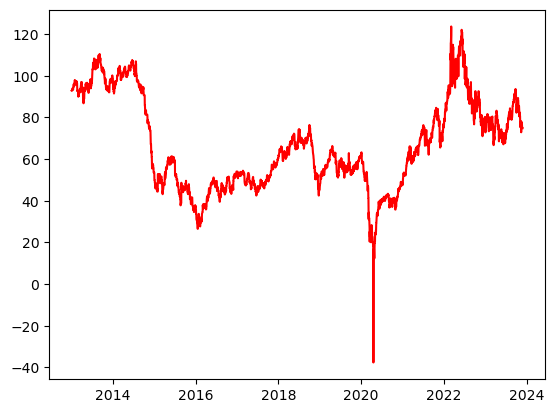

In [13]:
plt.plot(processed_df[["Crude oil spot USD per barrel (Brent)"]], "r-")

<AxesSubplot:>

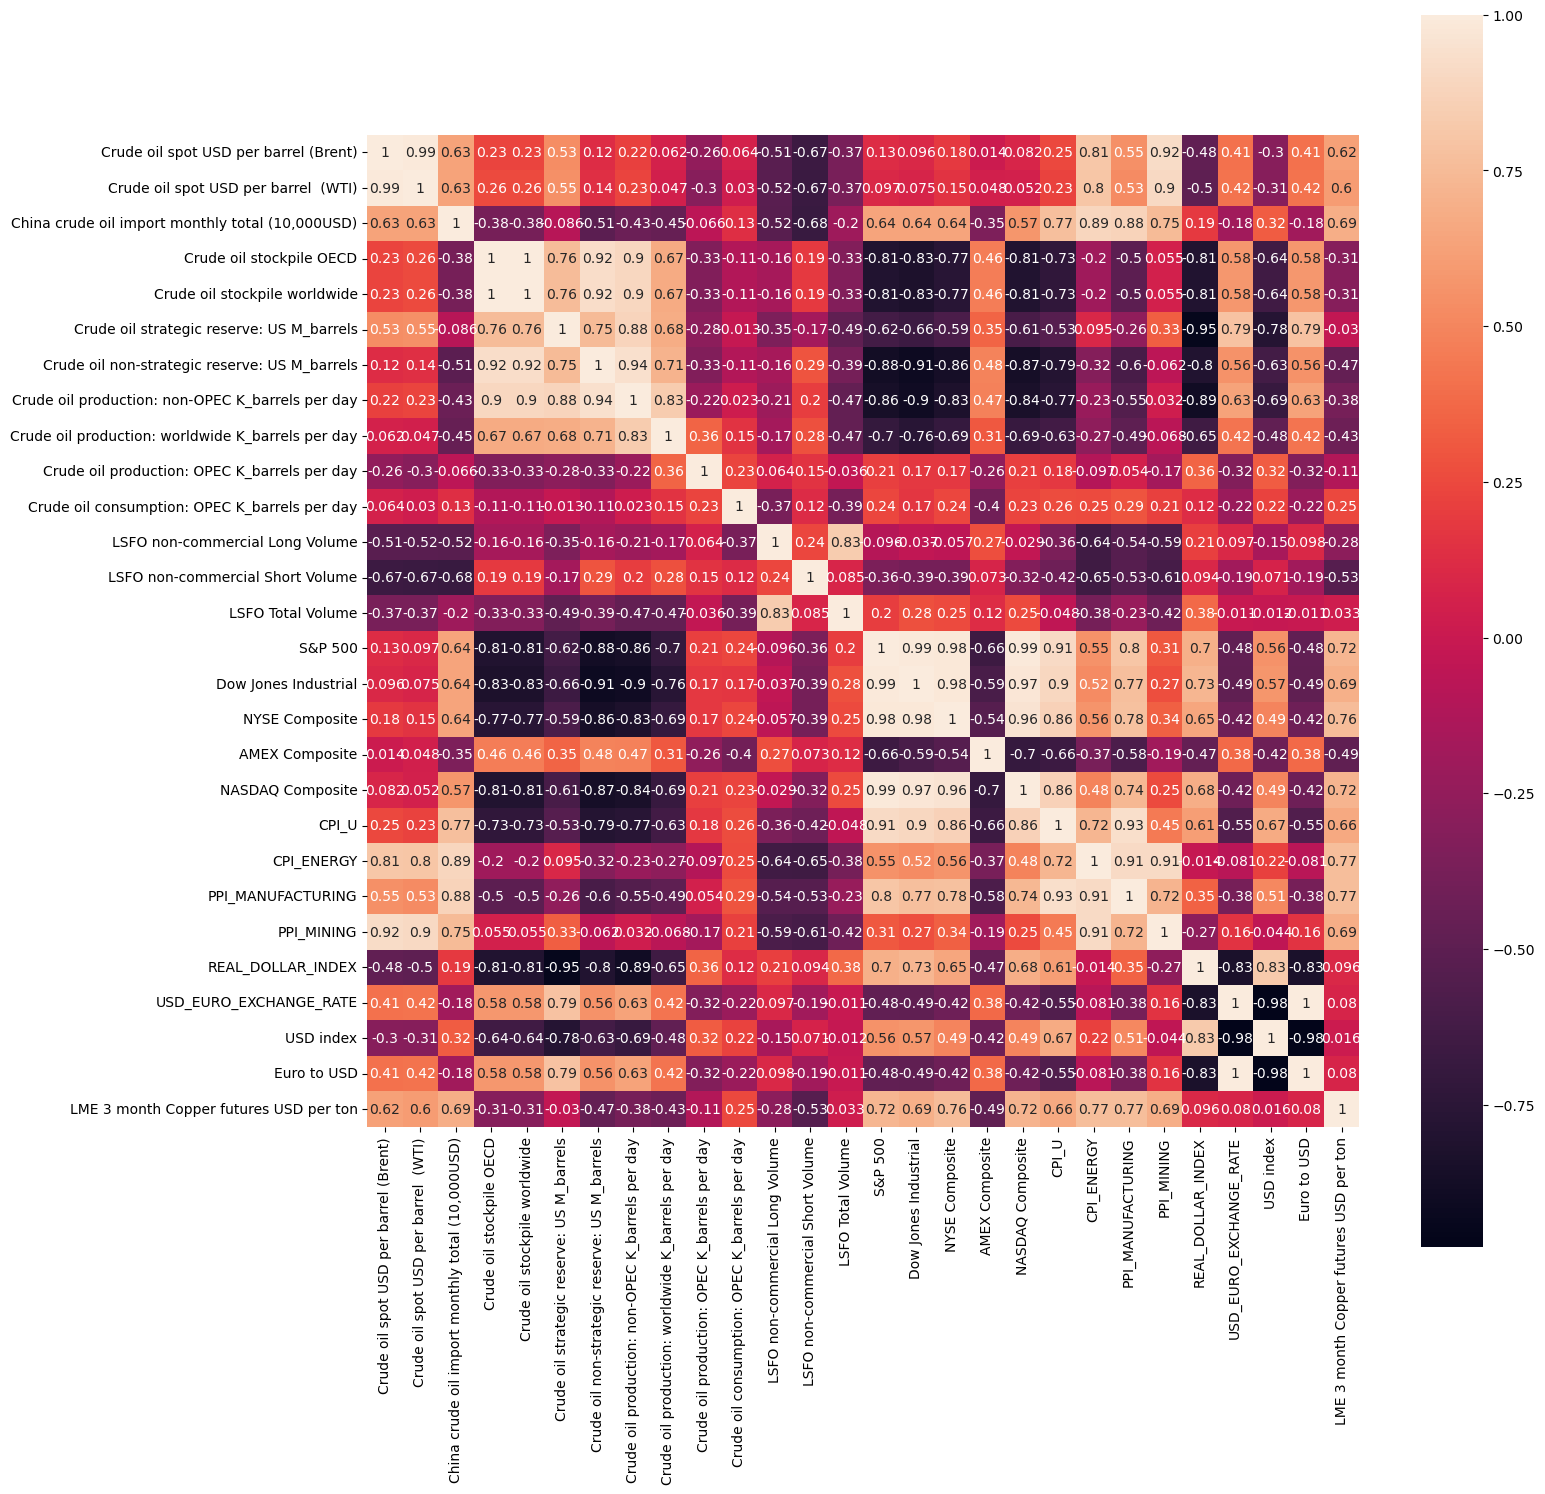

In [15]:
corr=processed_df.corr()
plt.figure(figsize=[16, 16])
sns.heatmap(corr,
            annot=True,
            cmap="rocket",
            square=True)

By common sense, some data should have strong correlation, such as oil stockpile. The weak correlation is likely caused by low data frequency and ffill().